<a href="https://colab.research.google.com/github/ishawagh19/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

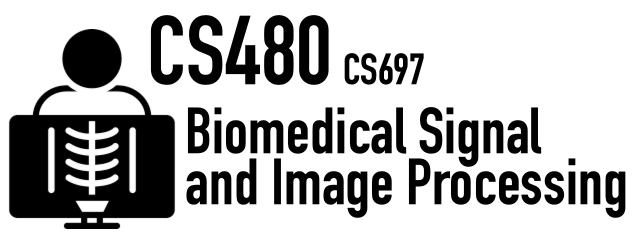
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER

There are 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

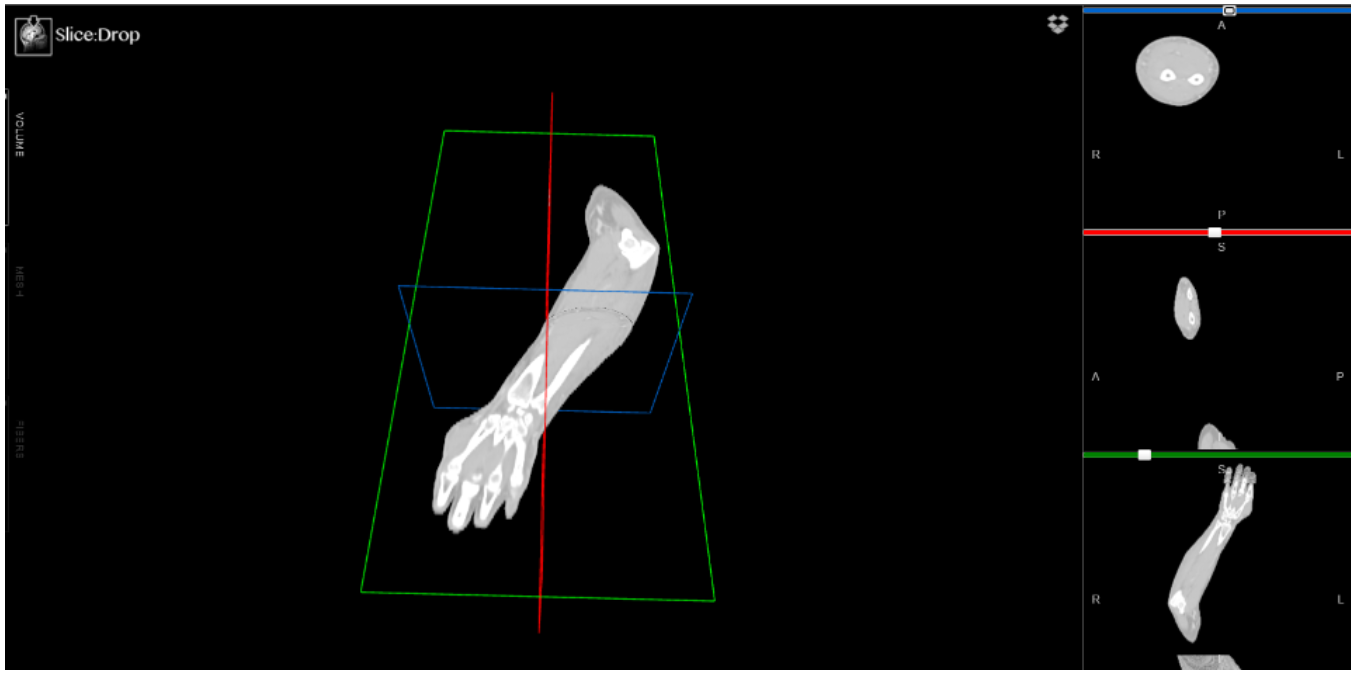

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [ ]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread
import os

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
list_of_DICOM_files = os.listdir('ct')                                     # stores DICOM files in a list
list_of_DICOM_files.sort()                                                    # sorts the list
length_of_files = len(list_of_DICOM_files)                          # number_of_DICOM_files

slice0 = dcmread('ct/' + list_of_DICOM_files[0])                # loads the first DICOM file
dimensions = list(slice0.pixel_array.shape)                          # reads the dimension of the single image slice
dimensions.append(length_of_files)                                      # turns the shape into 3D

print(dimensions)                                                                  # [  length_of_image      X     breadth_of_image      X     number_of_DICOM_files  ]
      
repository_3D = np.zeros(dimensions, dtype=float)                     # creates a 3D numpy array to store DICOM files

for i in range(length_of_files):                                              # loops through all the DICOM files
  DICOM_file = dcmread('ct/' + list_of_DICOM_files[i])    
  repository_3D[:, :, i] = DICOM_file.pixel_array                # stores them in the 3D numpy array

[454, 512, 220]


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.
pixel_spacing = slice0.PixelSpacing
slice_thickness = slice0.SliceThickness
axial_aspect = pixel_spacing[1]/pixel_spacing[0]
sagittal_aspect = pixel_spacing[1]/slice_thickness
coronal_aspect = slice_thickness/pixel_spacing[0]

print("\n Pixel Spacing \t : ", pixel_spacing)
print("\n Slice Thickness \t : ", slice_thickness)
print("\n Axial Aspect \t\t : ", axial_aspect)
print("\n Sagittal Aspect \t : ", sagittal_aspect)
print("\n Coronal Aspect \t : ", coronal_aspect)


 Pixel Spacing 	 :  [0.619141, 0.619141]

 Slice Thickness 	 :  3.000000

 Axial Aspect 		 :  1.0

 Sagittal Aspect 	 :  0.20638033333333336

 Coronal Aspect 	 :  4.845422932740684


Reference :

https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py

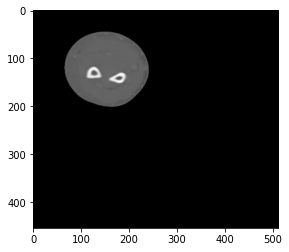

In [ ]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(repository_3D[:, :, dimensions[2]//2], cmap='gray')

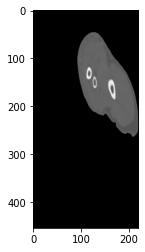

In [ ]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(repository_3D[:, dimensions[2]//2, :], cmap='gray')

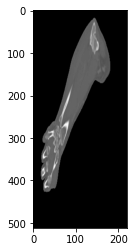

In [ ]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(repository_3D[dimensions[2]//2, :, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

(0028, 1050) Window Center                       DS: '30.0'
(0028, 1051) Window Width                        DS: '410.0'
(0028, 1052) Rescale Intercept                   DS: '-1024.0'

 Level 		 : 30
 Window 	 : 410
 Rescale  		 : -1024

 vmin  	  : -175.0
 vmax  	  : 235.0


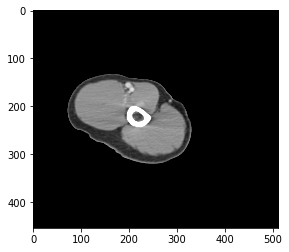

In [ ]:
# TODO: YOUR CODE
image_slice = dcmread('ct/' + list_of_DICOM_files[200])                  # Loading an image slice
window_center = image_slice[0x0028, 0x1050]                                  # WindowCenter
window_width = image_slice[0x0028, 0x1051]                                   # WindowWidth
rescaled_intercept = image_slice[0x0028, 0x1052]                              # RescaleIntercept
print(window_center)               
print(window_width)         
print(rescaled_intercept)      

# Alternatively
level = image_slice['WindowCenter'].value
window = image_slice['WindowWidth'].value
rescale = image_slice['RescaleIntercept'].value
print("\n Level \t\t :", level)     
print(" Window \t :", window)  
print(" Rescale  \t\t :", rescale)  

vmin = level - window/2
vmax = level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

hu_pixels = image_slice.pixel_array
plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.


 vmin  	  : -5.0
 vmax  	  : 65.0


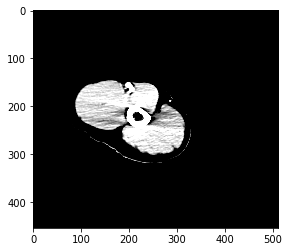


 vmin  	  : -35.0
 vmax  	  : 35.0


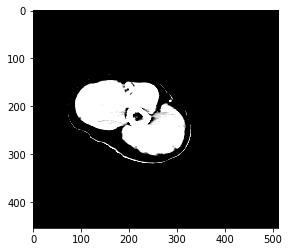


 vmin  	  : 450.0
 vmax  	  : 550.0


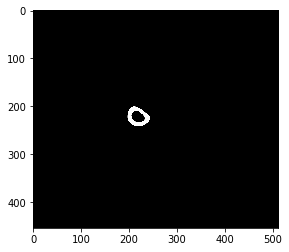


 vmin  	  : -300.0
 vmax  	  : 1700.0


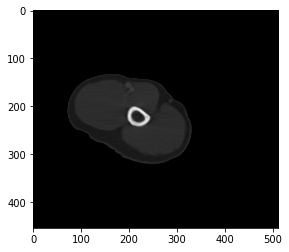


 vmin  	  : -4500.0
 vmax  	  : 5500.0


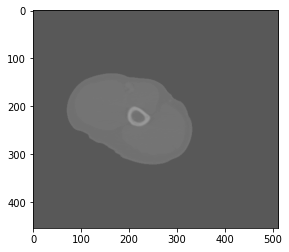

In [ ]:
# TODO: YOUR CODE
#1)-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
level = 30
window = 70

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

#2)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
level = 0
window = 70

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

#3)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
level = 500
window = 100

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

#4)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
level = 700
window = 2000

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

#5)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
level = 500
window = 10000

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

With a level value of 400 and window of 500 and above we can clearly visualise the bones and for the values below the given values we can visualise various tissues and bones.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

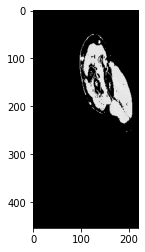

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask=(repository_3D.copy()).astype(int16)
new_mask[new_mask < 1058] = 0
new_mask[new_mask > 1200] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

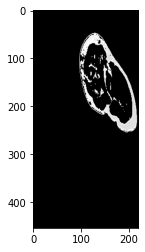

In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask=(repository_3D.copy()).astype(int16)
new_mask[new_mask > 1050] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

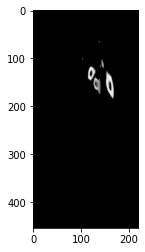

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask=(repository_3D.copy()).astype(int16)
new_mask[new_mask < 1150] = 0
plt.imshow(new_mask[:, 100, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

I think the segmentations are good and visualise the three different components. But it took a lot of playing around with different values for the segmentations to enhance the visualisation of the different components and so I believe it can be more clearer!

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""